In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 784)
X_test shape (10000, 784)


In [5]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [6]:
X_train /= 255
X_test /= 255

In [7]:
classes = 10

Y_train = to_categorical(y_train, num_classes=classes)
Y_test = to_categorical(y_test, num_classes=classes)

In [8]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


Model

In [10]:
model = Sequential()
model.add(Dense(1000, activation="relu", input_shape=(784,)))
model.add(Dropout(rate=0.25))
model.add(Dense(1000, activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(500, activation="relu"))
model.add(Dropout(rate=0.15))
model.add(Dense(classes, activation="softmax"))

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

In [13]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=15,
          validation_data=(X_test, Y_test),
          verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 4ms/step - loss: 0.2352 - accuracy: 0.9283 - val_loss: 0.1150 - val_accuracy: 0.9656
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1074 - accuracy: 0.9669 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.0814 - val_accuracy: 0.9754
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.0796 - val_accuracy: 0.9783
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0858 - val_accuracy: 0.9759
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0574 - val_accuracy: 0.9822
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0724 - val_accuracy: 0.9803
Epoch 

In [14]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9814
Test score: 0.08315329253673553
Test accuracy: 0.9814000129699707


In [15]:
model.save("/content/drive/MyDrive/Models(AI)/mnist_v2.h5")

In [17]:
model_history_1 = history.history
print(model_history_1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


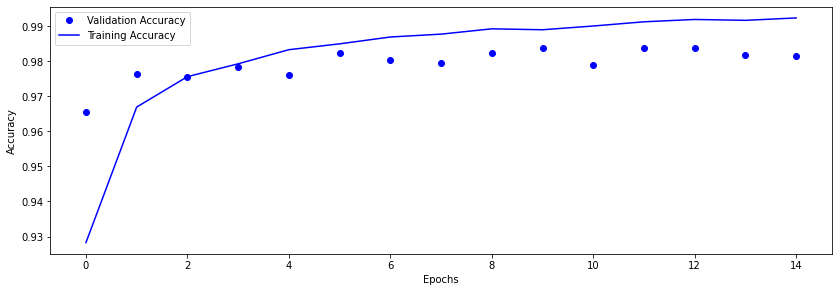

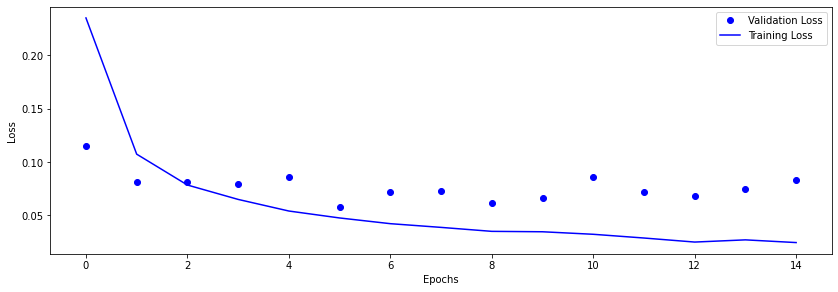

In [20]:
import matplotlib.pyplot as plt


validation_accu_1 = model_history_1['val_accuracy']
model_loss_1 = model_history_1['loss']
validation_loss_1 = model_history_1['val_loss']
model_accu_1 = model_history_1['accuracy']
epochs_1 = range(len(model_accu_1))

#plot for validation accuracy and Training Accuracy
plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs_1, validation_accu_1, 'bo', label = 'Validation Accuracy')
plt.plot(epochs_1, model_accu_1, 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot for validation loss and Training loss
plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs_1, validation_loss_1, 'bo', label = 'Validation Loss')
plt.plot(epochs_1, model_loss_1, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from tensorflow.keras.models import load_model

In [23]:
import numpy as np

In [24]:
DNN = load_model('/content/drive/MyDrive/Models(AI)/mnist_v2.h5')

In [25]:
import cv2
from google.colab.patches import cv2_imshow

In [15]:
def input_prepare(img):
    img = np.asarray(img)              
    img = cv2.resize(img, (28, 28 ))  
    img = cv2.bitwise_not(img)        
    img = img / 255                 
    img = img.reshape(1, 784)     
    return img 

In [16]:
img = cv2.imread('image.png')
orig = img.copy()  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = input_prepare(img)

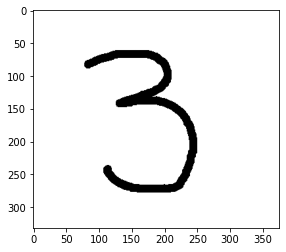

In [17]:
import matplotlib.pyplot as plt
plt.imshow(orig)

In [18]:
pred = DNN.predict(img)

In [19]:
np.argmax(pred, axis=1)

array([3])

Deployment

In [ ]:
!pip install flask-ngrok

In [26]:
from tensorflow.keras.models import load_model
from flask import Flask, request
from flask_ngrok import run_with_ngrok
import cv2
import uuid
import os
import numpy as np

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
  return "<h1>MNIST API By Muhammad Hanan Asghar</h1>"

@app.route("/model", methods=['POST'])
def model():
  request_data = request.get_json(force=True)
  im_g = request_data['img']
  im_g = np.array(im_g)
  im_g = cv2.resize(im_g, (28, 28 ))
  filename = uuid.uuid4().hex
  cv2.imwrite(f"{filename}.jpg", im_g)
  img = cv2.imread(f"{filename}.jpg")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (28, 28 ))            
  img = cv2.bitwise_not(img)        
  img = img / 255.0             
  img = img.reshape(1, 784)        
  os.remove(f"{os.path.abspath(os.getcwd())}/{filename}.jpg")
  pred = DNN.predict(img)
  return str(np.argmax(pred, axis=1)[0])

app.run()